<a href="https://colab.research.google.com/github/XiaonaZhou/data_analytics_2/blob/main/Datathon/Unemlployment_rate_US_and_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unemployment rate and COVID 19

# Overview

In this project, we look into the unemployment rate and COVID 19. We investigate whether there is a relationship between the two. 

This notebook contains the following parts:

1. import unemployment dataset and fill in NA values 

2. plot unemployment rate for all states

3. import COVID dataset

4. compute new cases and new deaths, group by month

5. join unemployment rate and COVID dataset

6. output CSV file to use in Tableau 

# Unemployment rate dataset 

## Import data and handling NA values

- How I handled the missing values? 

1. Since we don't have any values for October, November, and December, I simply drop those months.

2. There are 7 missing values for Puerto Rico. It's not wise to use the mean of all states to fill in NA values, so I sort the data by unemployment rate in January and take the 10 states that have unemployment rates close to Puerto Rico, and use the mean of these unemployment rates to fill in NA values.

In [ ]:
import pandas as pd

In [ ]:
state_unemp_df = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/hackathon/data/state_unemployment_data_1.csv')

In [ ]:
state_unemp_df.head()

,State,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,Alabama,2.7,2.7,3.5,12.9,9.6,7.5,7.9,5.6,6.6,NaN,NaN,NaN
1,Alaska,6.0,5.8,5.6,12.9,12.7,12.4,11.6,7.4,7.2,NaN,NaN,NaN
2,Arizona,4.5,4.5,5.5,12.6,9.0,10.0,10.6,5.9,6.7,NaN,NaN,NaN
3,Arkansas,3.5,3.9,4.8,10.2,9.6,8.0,7.1,7.4,7.3,NaN,NaN,NaN
4,California,3.9,2.5,5.3,15.5,16.4,14.9,13.3,11.4,11.0,NaN,NaN,NaN


In [ ]:
state_unemp_df.shape

(52, 13)

Checking NA values

In [ ]:
state_unemp_df.isna().sum()

State     0
Jan       0
Feb       0
March     1
April     1
May       1
June      1
July      1
Aug       1
Sept      1
Oct      52
Nov      52
Dec      52
dtype: int64

Since we don't have any values for October, November, and December, we would drop those months. 


In [ ]:
state_unemp_df.drop(['Oct','Nov','Dec'],  axis=1,inplace=True)

In [ ]:
state_unemp_df.columns

Index(['State', 'Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug',
       'Sept'],
      dtype='object')

In [ ]:
test_1 = state_unemp_df.set_index('State').T # make state row as header

In [ ]:
test_1.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,D.C.,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Puerto Rico
Jan,2.7,6.0,4.5,3.5,3.9,2.5,3.7,4.0,5.2,2.8,3.1,2.7,2.8,3.5,3.1,2.8,3.1,4.3,5.1,3.1,3.3,2.8,3.8,3.2,5.5,3.5,3.5,3.9,3.6,2.6,3.8,4.8,3.8,3.6,2.3,4.1,3.3,3.3,4.7,3.1,2.4,3.4,3.3,4.5,2.5,2.4,2.7,3.9,5.0,3.5,3.7,8.9
Feb,2.7,5.8,4.5,3.9,2.5,2.8,3.9,5.2,2.8,3.1,2.7,2.7,3.4,3.1,2.8,3.1,4.2,5.2,3.2,3.3,2.8,3.6,3.1,5.4,3.5,3.5,2.9,3.6,3.6,3.8,4.8,3.7,3.6,2.2,4.2,3.2,3.3,4.7,3.4,2.5,3.3,3.4,3.5,2.5,3.4,2.6,3.8,4.9,3.7,2.7,5.8,4.5
March,3.5,5.6,5.5,4.8,5.3,4.5,3.7,5.1,6.0,4.3,4.2,2.6,2.6,4.6,3.2,3.7,3.1,5.8,6.1,3.2,3.3,2.9,4.1,3.1,5.3,4.5,3.5,4.2,6.3,2.6,3.8,5.9,4.5,4.4,2.2,5.5,3.1,3.3,6.0,4.6,2.6,3.3,3.5,4.7,3.6,3.2,3.3,5.1,6.1,3.4,3.7,NaN
April,12.9,12.9,12.6,10.2,15.5,11.3,7.9,14.3,11.1,12.9,11.9,22.3,11.5,16.4,16.9,10.2,11.2,15.4,14.5,10.6,9.9,15.1,22.7,8.1,15.4,9.7,11.3,8.2,28.3,16.3,15.3,11.3,14.5,12.2,8.5,16.8,13.7,14.2,15.1,17.0,12.1,10.2,14.7,12.8,9.7,15.6,10.6,15.4,15.2,14.1,9.2,NaN
May,9.6,12.7,9.0,9.6,16.4,10.2,9.6,15.9,8.8,13.7,9.4,23.5,9.0,15.3,12.3,10.2,10.0,10.9,14.2,9.4,10.0,16.6,21.3,9.9,10.5,10.1,9.0,5.3,25.3,15.4,15.4,9.1,14.5,12.8,9.1,13.9,12.6,14.3,13.4,16.4,12.4,9.4,11.0,13.0,8.6,12.8,9.0,15.1,12.9,12.1,8.8,NaN


In [ ]:
test_1.isna().sum()

State
Alabama           0
Alaska            0
Arizona           0
Arkansas          0
California        0
Colorado          0
Connecticut       0
Delaware          0
D.C.              0
Florida           0
Georgia           0
Hawaii            0
Idaho             0
Illinois          0
Indiana           0
Iowa              0
Kansas            0
Kentucky          0
Louisiana         0
Maine             0
Maryland          0
Massachusetts     0
Michigan          0
Minnesota         0
Mississippi       0
Missouri          0
Montana           0
Nebraska          0
Nevada            0
New Hampshire     0
New Jersey        0
New Mexico        0
New York          0
North Carolina    0
North Dakota      0
Ohio              0
Oklahoma          0
Oregon            0
Pennsylvania      0
Rhode Island      0
South Carolina    0
South Dakota      0
Tennessee         0
Texas             0
Utah              0
Vermont           0
Virginia          0
Washington        0
West Virginia     0
Wisconsin     

Puerto Rico has 7 missing values. 

In [ ]:
test_1['Puerto Rico']

Jan      8.9
Feb      4.5
March    NaN
April    NaN
May      NaN
June     NaN
July     NaN
Aug      NaN
Sept     NaN
Name: Puerto Rico, dtype: float64

Unemployment rate is missing from March to Sept. 

It's not wise to use the mean of all statements to fill in NA values. Let's sort the data by unemployment rate in January and take the 10 states that have unemployment rate close to Pueto Rico, and use the mean of these unemployment rate to fill in NA values.

In [ ]:
sorted_df = state_unemp_df.sort_values(by='Jan')

In [ ]:
sorted_df.reset_index(drop=True, inplace=True)

In [ ]:
sorted_df

,State,Jan,Feb,March,April,May,June,July,Aug,Sept
0,North Dakota,2.3,4.2,2.2,8.5,9.1,6.1,6.6,5.0,4.4
1,Vermont,2.4,2.6,3.2,15.6,12.8,9.4,8.3,4.8,4.2
2,South Carolina,2.4,3.3,2.6,12.1,12.4,8.7,8.6,6.3,5.1
3,Utah,2.5,3.4,3.6,9.7,8.6,5.1,4.5,4.1,5.0
4,Colorado,2.5,2.8,4.5,11.3,10.2,10.5,7.4,6.7,6.4
5,New Hampshire,2.6,3.8,2.6,16.3,15.4,11.8,8.1,6.5,6.0
6,Alabama,2.7,2.7,3.5,12.9,9.6,7.5,7.9,5.6,6.6
7,Virginia,2.7,3.8,3.3,10.6,9.0,8.4,8.0,6.1,6.2
8,Hawaii,2.7,2.7,2.6,22.3,23.5,13.9,13.1,12.5,15.1
9,Massachusetts,2.8,3.6,2.9,15.1,16.6,17.4,16.1,11.3,9.6


`df_mean_na` contains data values from the ten states that have unemployment rate close to Puerto Rico in Janaury.

In [ ]:
df_mean_na = sorted_df.iloc[-11:-1]

In [ ]:
test_1.index

Index(['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept'], dtype='object')

In [ ]:
# Missing value months
months = ['March', 'April', 'May', 'June', 'July', 'Aug', 'Sept']

Fill in missing values

In [ ]:
for month in months:
  sorted_df[month].fillna(value=df_mean_na[month].mean(), inplace=True)

In [ ]:
filled_df = sorted_df.set_index('State').T 

In [ ]:
filled_df.isna().sum().sum()

0

0 missing value now

## Visualization

**Most of the states have highest unemployment rate in April.**

Text(0, 0.5, 'Unemployment rate')

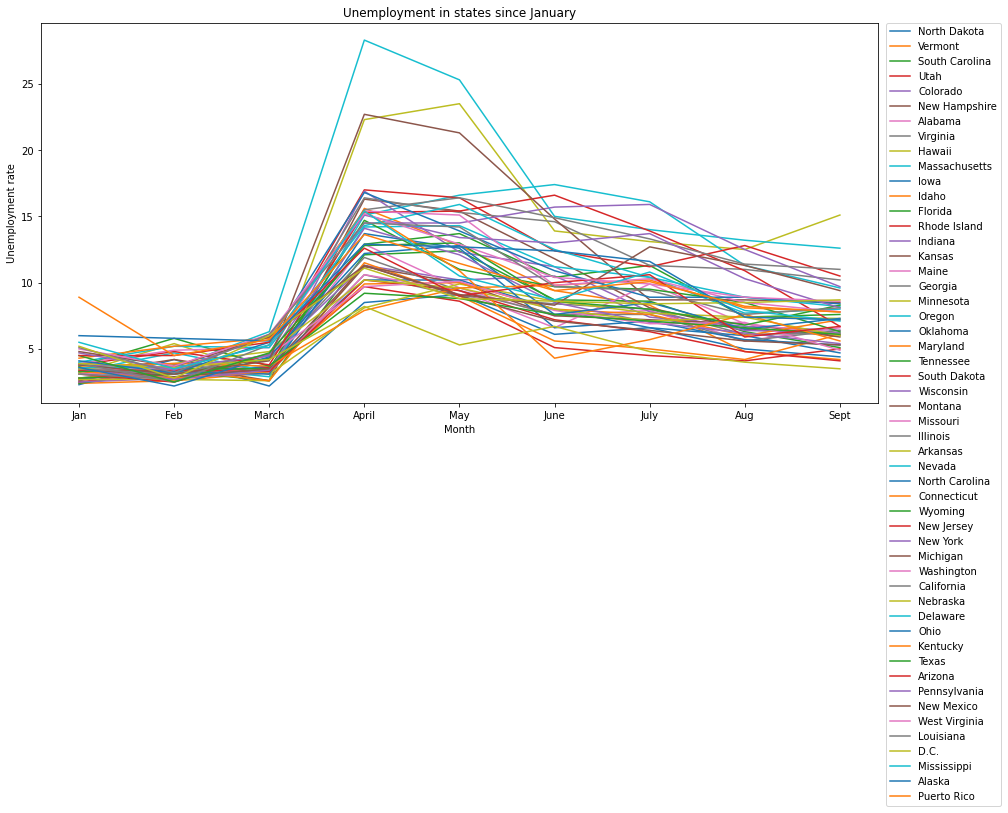

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.figure(figsize=(15,7))
for i in filled_df.columns:
  filled_df[i].plot(legend=True)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Unemployment in states since January")
plt.xlabel("Month")
plt.ylabel("Unemployment rate")



Take a look at the states where COVID is badly spreaded.

In [ ]:
states = ['New York', 'Texas', 'California', 'Florida', 'New Jersey']

We see the same trend for these five states. There was a rapid increase in the unemployment rate in April, and the rate was dropping with some fluctuations. 

Text(0.5, 1.0, 'Unemployment in states since January')

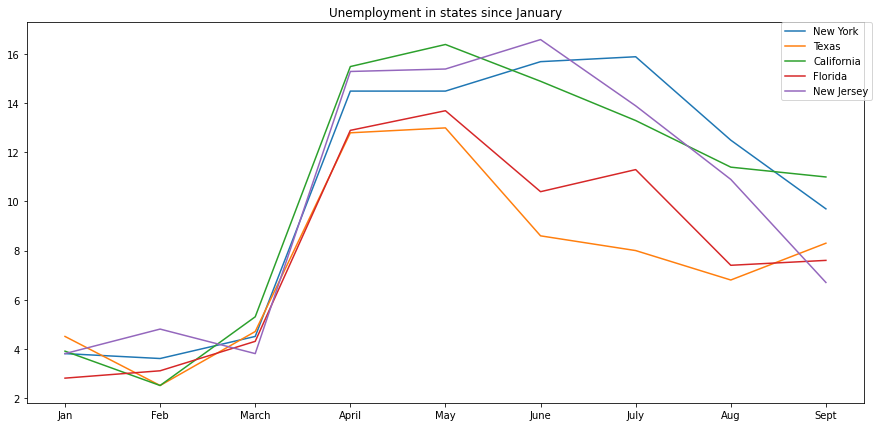

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.figure(figsize=(15,7))
for i in states:
  filled_df[i].plot(legend=True)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Unemployment in states since January")

# Compare unemployment rate wih COVID 19

## Load data and compute new cases and new deaths for each day

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

Functions for calculating new cases and new deaths

In [ ]:
def get_new_cases(df):
  new_cases = df['cases']-df['cases'].shift(1)
  new_cases.iloc[0] = df['cases'].iloc[0]
  return new_cases


def get_new_deaths(df):
  new_deaths = df['deaths']-df['deaths'].shift(1) # today's death - yesterday's death(obtain by shifting the deaths column down by one
  new_deaths.iloc[0] = df['deaths'].iloc[0]
  return new_deaths

### New York 

I try to work out data manipulation steps for New York first and then apply it to all the states. 

In [ ]:
# create new_cases and new deaths columns for New York
ny_df = df[df['state']=='New York']
ny_df['new_cases']=get_new_cases(ny_df)
ny_df['new_deaths']=get_new_deaths(ny_df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
ny_df

,date,state,fips,cases,deaths,new_cases,new_deaths
246,2020-03-01,New York,36,1,0,1.0,0.0
261,2020-03-02,New York,36,1,0,0.0,0.0
276,2020-03-03,New York,36,2,0,1.0,0.0
293,2020-03-04,New York,36,11,0,9.0,0.0
313,2020-03-05,New York,36,22,0,11.0,0.0
...,...,...,...,...,...,...,...
18142,2021-01-26,New York,36,1358964,42273,11040.0,183.0
18197,2021-01-27,New York,36,1369329,42434,10365.0,161.0
18252,2021-01-28,New York,36,1383112,42639,13783.0,205.0
18307,2021-01-29,New York,36,1396063,42825,12951.0,186.0


Create a column `month`. It is used for grouping latter. 

In [ ]:
ny_df['month'] = pd.DatetimeIndex(ny_df['date']).month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Group by `month` and get sums

In [ ]:
ny_month = ny_df.groupby(['month']).sum() 

Keep only months from March to Sep since the COVID data starts from March, and the unemployment data ends in Sep

In [ ]:
ny_df = ny_df[(ny_df['month'] >= 3) & (ny_df['month'] <=9)]

In [ ]:
ny_df['month'].unique()

array([3, 4, 5, 6, 7, 8, 9])

In [ ]:
ny_month

,fips,cases,deaths,new_cases,new_deaths
month,,,,,
1,1080,36325821,1208784,429915.0,5439.0
3,1116,464981,7943,76211.0,1929.0
4,1080,6328973,425198,233485.0,21687.0
5,1116,10850463,854088,65879.0,6083.0
6,1080,11656829,918476,22567.0,2077.0
7,1116,12690287,995461,21581.0,596.0
8,1116,13329072,1005469,19757.0,169.0
9,1080,13535662,979548,23889.0,216.0
10,1116,15087402,1021540,48854.0,395.0


Combine New York COVID data with unemployment data

In [ ]:
ny_all = {'Month': list(filled_df['New York'].index[2:]), 
        'Unemployment rate': list(filled_df['New York'][2:]), 
        'New cases': list(ny_month['new_cases'][0:7])} 

ny_all= pd.DataFrame(ny_all)
print (ny_all)

   Month  Unemployment rate  New cases
0  March                4.5   429915.0
1  April               14.5    76211.0
2    May               14.5   233485.0
3   June               15.7    65879.0
4   July               15.9    22567.0
5    Aug               12.5    21581.0
6   Sept                9.7    19757.0


Plot new cases and unemployment rate on the same graph for New York. 

Text(0.5, 1.0, 'New York COVID new cases and  Unemployment rate')

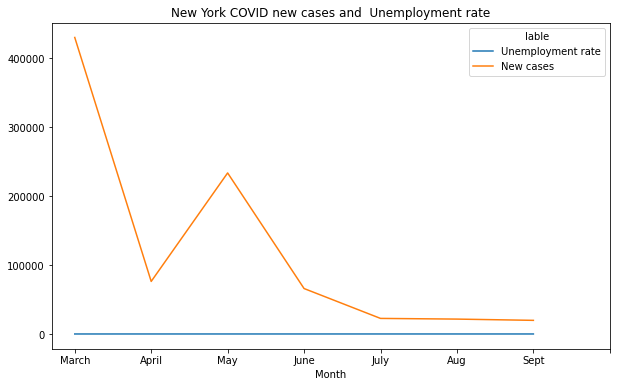

In [ ]:
df_plot=ny_all.set_index('Month')
df_plot.plot(figsize=(10,6), xticks=range(0, 8)).legend(title='lable', bbox_to_anchor=(1, 1))
plt.title("New York COVID new cases and  Unemployment rate")

Unfortunately, the unemployment rate line looks like a flat line because the scale of the two is very different. 

So I plot the two line on different y-axis. 

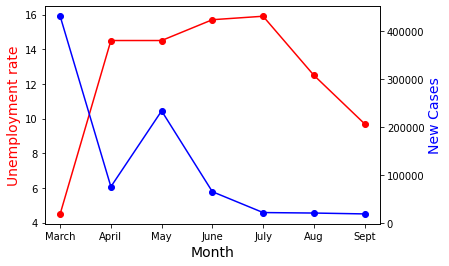

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(ny_all['Month'], ny_all['Unemployment rate'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Month",fontsize=14)
# set y-axis label
ax.set_ylabel("Unemployment rate",color="red",fontsize=14)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(ny_all['Month'], ny_all['New cases'],color="blue",marker="o")
ax2.set_ylabel("New Cases",color="blue",fontsize=14)
plt.show()

### Data manipulation for all states

Reapeat what have done on New York data for all states

In [ ]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
states = list(state_unemp_df['State'])

In [ ]:
states

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'D.C.',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming',
 'Puerto Rico']

In [ ]:
data_new_case_death = []
for name in states:
  if name in list(df['state'].unique()):
    state_df = df[df['state']==name]
    state_df['new_cases']=get_new_cases(state_df)
    state_df['new_deaths']=get_new_deaths(state_df)
    data_new_case_death.append(state_df)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data_new_case_death = pd.concat(data_new_case_death)

In [ ]:
data_new_case_death.head()

,date,state,fips,cases,deaths,new_cases,new_deaths
586,2020-03-13,Alabama,1,6,0,6.0,0.0
637,2020-03-14,Alabama,1,12,0,6.0,0.0
689,2020-03-15,Alabama,1,23,0,11.0,0.0
742,2020-03-16,Alabama,1,29,0,6.0,0.0
795,2020-03-17,Alabama,1,39,0,10.0,0.0


In [ ]:
data_new_case_death['month'] = pd.DatetimeIndex(data_new_case_death['date']).month
data_new_case_death.head()

,date,state,fips,cases,deaths,new_cases,new_deaths,month
586,2020-03-13,Alabama,1,6,0,6.0,0.0,3
637,2020-03-14,Alabama,1,12,0,6.0,0.0,3
689,2020-03-15,Alabama,1,23,0,11.0,0.0,3
742,2020-03-16,Alabama,1,29,0,6.0,0.0,3
795,2020-03-17,Alabama,1,39,0,10.0,0.0,3


In [ ]:
 data_new_case_death_month= data_new_case_death.groupby(['state','month']).sum() 

In [ ]:
from google.colab import drive
drive.mount('drive')

Output COVID monthly dataset for Tableau use

In [ ]:
 data_new_case_death_month.to_csv('COVID_month.csv')
!cp COVID_month.csv "drive/My Drive/"

Select on months from March to Sept

In [ ]:
data_new_case_death = data_new_case_death[(data_new_case_death['month'] >= 3) & (data_new_case_death['month'] <=9)]

In [ ]:
data_new_case_death['month'].unique()

array([3, 4, 5, 6, 7, 8, 9])

In [ ]:
data_new_case_death_month.head()

fips     cases  deaths  new_cases  new_deaths
state   month                                               
Alabama 1        30  12459174  179087    94356.0      2739.0
        3        19      6129      42      999.0        14.0
        4        30    125166    4044     6069.0       258.0
        5        31    372033   14438    10884.0       358.0
        6        30    800287   23697    20093.0       320.0

In [ ]:
data_new_case_death_month.loc['New York']

,fips,cases,deaths,new_cases,new_deaths
month,,,,,
1,1080,36325821,1208784,429915.0,5439.0
3,1116,464981,7943,76211.0,1929.0
4,1080,6328973,425198,233485.0,21687.0
5,1116,10850463,854088,65879.0,6083.0
6,1080,11656829,918476,22567.0,2077.0
7,1116,12690287,995461,21581.0,596.0
8,1116,13329072,1005469,19757.0,169.0
9,1080,13535662,979548,23889.0,216.0
10,1116,15087402,1021540,48854.0,395.0


In [ ]:
final_df = []
for name in states:
  if name in list(df['state'].unique()):
    all = {'State' : list([name, name, name, name, name,name,name]),
        'Month': list(filled_df[name].index[2:]), 
        'Unemployment rate': list(filled_df[name][2:]),
        'New cases': list(data_new_case_death_month.loc[name]['new_cases'][0:7]),
        'New Deaths': list(data_new_case_death_month.loc[name]['new_deaths'][0:7])} 
    all= pd.DataFrame(all)
    final_df.append(all)


In [ ]:
final_df = pd.concat(final_df)

In [ ]:
final_df

,State,Month,Unemployment rate,New cases,New Deaths
0,Alabama,March,3.50,94356.0,2739.0
1,Alabama,April,12.90,999.0,14.0
2,Alabama,May,9.60,6069.0,258.0
3,Alabama,June,7.50,10884.0,358.0
4,Alabama,July,7.90,20093.0,320.0
...,...,...,...,...,...
2,Puerto Rico,May,11.45,1298.0,84.0
3,Puerto Rico,June,9.40,2239.0,44.0
4,Puerto Rico,July,10.08,3689.0,17.0
5,Puerto Rico,Aug,8.22,9316.0,66.0


Output COVID monthly dataset for Tableau use

In [ ]:
final_df.to_csv('COVID_Unemployment.csv')
!cp COVID_Unemployment.csv "drive/My Drive/"

## Unemployment rate and  new cases comparision in other states

In [ ]:
state = "Alabama"
un_case_state = final_df[final_df['State']==state]

In [ ]:
un_case_state.head()

,State,Month,Unemployment rate,New cases,New Deaths
0,Alabama,March,3.5,94356.0,2739.0
1,Alabama,April,12.9,999.0,14.0
2,Alabama,May,9.6,6069.0,258.0
3,Alabama,June,7.5,10884.0,358.0
4,Alabama,July,7.9,20093.0,320.0


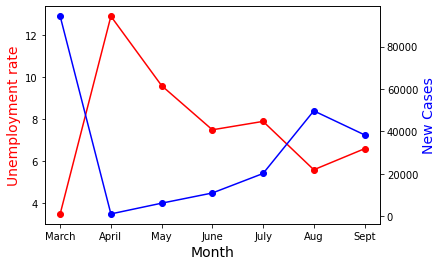

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(un_case_state['Month'], un_case_state['Unemployment rate'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Month",fontsize=14)
# set y-axis label
ax.set_ylabel("Unemployment rate",color="red",fontsize=14)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(un_case_state['Month'], un_case_state['New cases'],color="blue",marker="o")
ax2.set_ylabel("New Cases",color="blue",fontsize=14)
plt.show()

For Alabama, we almost see an inverse relationship between new cases and the unemployment rate. 
- In March, we have higest number of new cases and lowest unemployment rate.

- In April, we have lowest number of new cases and highest unemployment rate.

- After April, the number of new cases were increasing, but the unemployment rate was decreasing. 


Instead of plotting each states, I moved to Tableau for more visualizations. [Tableau link](https://public.tableau.com/profile/xiaona2089#!/vizhome/Datathon_16121240800860/COVIDandUnemployment?publish=yes)

# Conclusion

1. Most of the states have the highest unemployment rate in April.

2. For the five states we investigated, there was a rapid increase in the unemployment rate in April, and the rate was dropping with some fluctuations. 


